In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

In [4]:
df

,A,B,C
2016-07-01 00:00:00,-2.868286,-0.501651,0.677751
2016-07-01 00:00:01,-1.850711,0.944024,3.549571
2016-07-01 00:00:02,-0.067247,-1.295779,0.772909
2016-07-01 00:00:03,0.708418,0.345356,-0.485033
2016-07-01 00:00:04,-0.747672,-0.597751,-2.427360
...,...,...,...
2016-07-01 00:09:55,-1.390454,-1.214024,-0.261750
2016-07-01 00:09:56,-0.351706,0.462340,-1.199254
2016-07-01 00:09:57,-0.022663,-1.723155,0.037103
2016-07-01 00:09:58,-1.256238,-0.218687,0.250293


<AxesSubplot:>

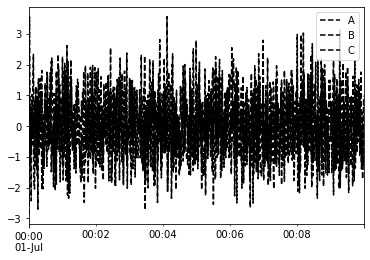

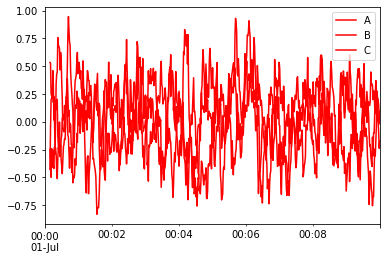

In [6]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'r')

In [13]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

AttributeError: module 'pandas' has no attribute 'ewma'

In [14]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [15]:
df.head()

,A,B,C,D
2016-06-06,1.407031,-0.549124,0.633610,1.204361
2016-06-07,1.418532,0.233520,0.565481,-0.034377
2016-06-08,2.003051,-0.344815,0.414120,0.426035
2016-06-09,0.275300,-2.119828,0.676504,0.208879
2016-06-10,-0.676186,-0.630946,-1.693466,-0.904112


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

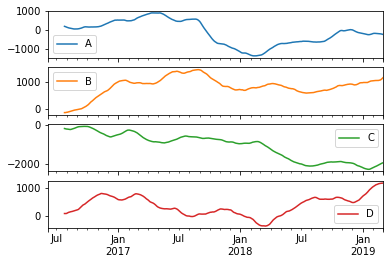

In [16]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [17]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-02-26,0.574464,3.160430,1.302669,1.597665
2019-02-27,0.675401,3.399119,1.156014,1.397426
2019-02-28,0.842122,3.465045,1.095343,1.187264
2019-03-01,0.865769,3.153531,1.053893,0.996430


In [18]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,2.116298,-0.432364,0.916351,1.187172
2016-06-08,3.020403,-0.508382,1.148638,1.323455
2016-06-09,3.541281,-1.076349,1.433907,1.443816
2016-06-10,3.718571,-1.543318,1.266375,1.335210


In [19]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

In [20]:
# EWMA
# Why use EWMA?

In [21]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [22]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting